# Frequencies Spectra for Individual Particles

In [1]:
import numpy as np
import math
import pandas as pd
import trackpy as tp
import matplotlib.pyplot as plt

In [2]:
roi_size = 20.0
roi_center_x = 776.0
roi_center_y = 597.0
fps = 99.0

In [4]:
folderPath = r'G:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\103Vbias\20230727spectra\04_an_frequenciesSpectra'

In [5]:
pos_filepath = folderPath + r'\inputs' + r'\position_noTiff.txt'

In [6]:
col_names = [r'particle_notrack',r'frame',r'x',r'y']

In [7]:
df_pos = pd.read_csv(pos_filepath, header = None, names = col_names)

In [8]:
df_pos.head()

,particle_notrack,frame,x,y
0,1,0,741.606,421.285
1,2,0,746.121,429.531
2,3,0,763.478,442.788
3,4,0,840.229,455.421
4,5,0,872.425,455.960


In [9]:
#cacluate CM of particle cloud for each frame:

In [10]:
df_cm = df_pos.groupby('frame')[['x','y']].mean().reset_index()
df_cm.columns = ['frame', 'x_CM', 'y_CM']

In [11]:
df_pos = df_pos.merge(df_cm, on = 'frame', how = 'left')
df_pos.head()

,particle_notrack,frame,x,y,x_CM,y_CM
0,1,0,741.606,421.285,802.520682,614.408015
1,2,0,746.121,429.531,802.520682,614.408015
2,3,0,763.478,442.788,802.520682,614.408015
3,4,0,840.229,455.421,802.520682,614.408015
4,5,0,872.425,455.960,802.520682,614.408015


In [12]:
df_linked = tp.link(df_pos, 7.0, memory = 0)

Frame 971: 698 trajectories present.


In [13]:
df_linked.head()

,particle_notrack,frame,x,y,x_CM,y_CM,particle
0,1,0,741.606,421.285,802.520682,614.408015,0
475,476,0,934.621,669.123,802.520682,614.408015,1
476,477,0,969.010,669.361,802.520682,614.408015,2
477,478,0,864.212,670.870,802.520682,614.408015,3
478,479,0,629.403,670.738,802.520682,614.408015,4


In [14]:
roi_condition = ((df_linked['x'] < roi_center_x + roi_size) &
                 (df_linked['y'] < roi_center_y + roi_size) & 
                 (df_linked['y'] > roi_center_y - roi_size) & 
                 (df_linked['y'] > roi_center_y - roi_size))

In [15]:
df_roi = df_linked[roi_condition]

In [16]:
df_roi.size

111538

In [17]:
df_linked.size

4890354

In [18]:
particles_listing = np.unique(df_roi['particle'])

In [19]:
type(particles_listing)

numpy.ndarray

In [20]:
particles_listing

array([   113,    116,    360, ..., 164277, 164286, 164289], dtype=int64)

In [21]:
len(particles_listing)

3390

In [22]:
traj_113 = df_roi[df_roi['particle'] == 113]

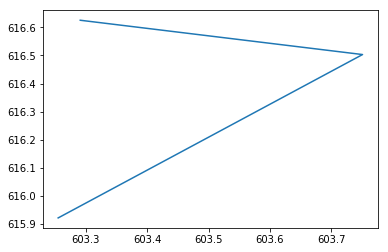

In [23]:
fig, ax = plt.subplots()
ax.plot(traj_113['x'], traj_113['y'])


In [24]:
arr_traj_lengths = np.empty(len(particles_listing))

In [25]:
for i in range(0, len(particles_listing)):
    cur_len = len(df_roi[df_roi['particle'] == particles_listing[i]])
    arr_traj_lengths[i] = cur_len
               

In [26]:
np.max(arr_traj_lengths)

742.0

In [27]:
pd_traj_len = pd.DataFrame({'particle':particles_listing, 'tr_len':arr_traj_lengths})

In [28]:
pd_traj_len.head()

,particle,tr_len
0,113,3.0
1,116,15.0
2,360,2.0
3,381,3.0
4,542,7.0


In [29]:
pd_traj_len.sort_values(by = 'tr_len', ascending = False, inplace = True)

In [30]:
pd_traj_len.head(20)

,particle,tr_len
11,579,742.0
18,626,467.0
1709,79028,406.0
2205,101818,371.0
15,605,200.0
594,26191,192.0
664,29889,165.0
7,559,151.0
13,593,138.0
1438,65787,124.0


In [71]:
traj_579 = df_roi[df_roi['particle'] == 579].copy()
N = len(traj_579['x'])

In [74]:
traj_579['x_rfcm'] = traj_579['x'] - traj_579['x_CM'] 
traj_579['y_rfcm'] = traj_579['y'] - traj_579['y_CM'] 
traj_579.head()

,particle_notrack,frame,x,y,x_CM,y_CM,particle,x_rfcm,y_rfcm
287,288,0,598.857,579.715,802.520682,614.408015,579,-203.663682,-34.693015
992,993,1,599.066,578.889,800.723103,619.268583,579,-201.657103,-40.379583
1726,1727,2,598.730,578.718,804.586371,614.085143,579,-205.856371,-35.367143
2427,2428,3,598.778,578.837,809.676655,617.720266,579,-210.898655,-38.883266
3147,3148,4,599.044,578.882,801.769397,616.903430,579,-202.725397,-38.021430


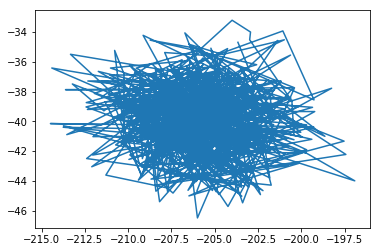

In [76]:

fig, ax = plt.subplots()
ax.plot(traj_579['x_rfcm'], traj_579['y_rfcm'])

In [77]:
arr_time_579 = np.linspace(0.0, 1.0 / fps * len(traj_579['x']), len(traj_579['x']))

In [78]:
N

742

In [85]:
def get_spectrum_drift(arr_t, arr_sig):
    slope, intercept = np.polyfit(arr_t, arr_sig, 1)
    arr_sig_nodrift = arr_sig - (slope * arr_t + intercept)
    arr_intens = np.fft.fft(arr_sig_nodrift)
    dt = arr_t[1] - arr_t[0]
    N = len(arr_t)
    print(N)
    arr_freqs = np.fft.fftfreq(N, dt)[:N//2]    
    return arr_freqs, arr_intens

In [100]:
def get_spectrum(arr_t, arr_sig):
    arr_sig_nomean = arr_sig - np.mean(arr_sig)
    arr_intens = np.fft.fft(arr_sig_nomean)
    dt = arr_t[1] - arr_t[0]
    N = len(arr_t)
    arr_freqs = np.fft.fftfreq(N, dt)[:N//2]    
    return arr_freqs, arr_intens

In [87]:
test_arr_freqs, test_arr_intens = get_spectrum(arr_time_579, traj_579['x_rfcm'])

742


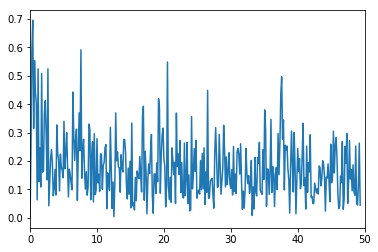

In [90]:
fig, ax = plt.subplots()
ax.set_xlim(0, 50)
ax.plot(test_arr_freqs, 2.0 / N * np.abs(test_arr_intens[0:N//2]))

In [94]:
arr_p = np.array(pd_traj_len['particle'])

742
467
406
371
200
192
165
151
138
124
113
97
91
79
77
76
73
72
72
69


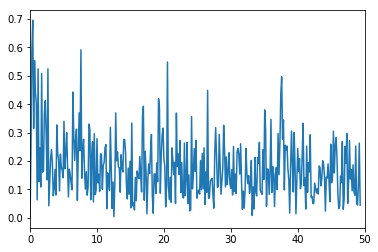

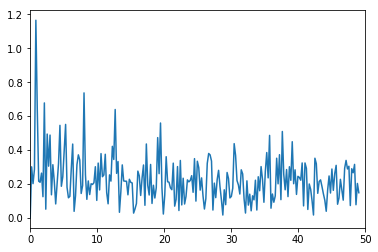

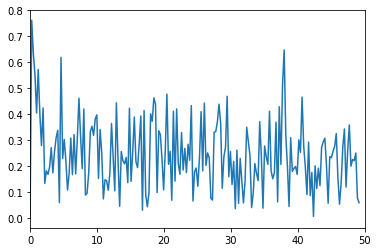

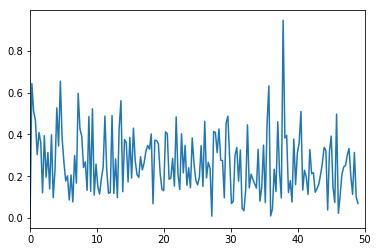

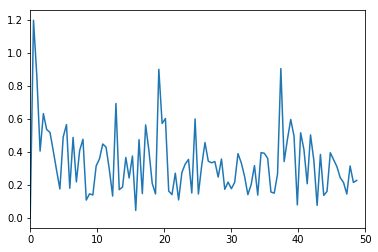

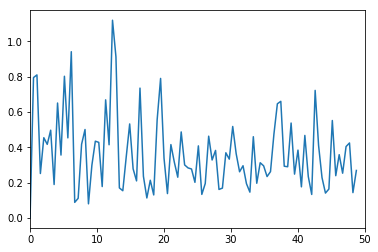

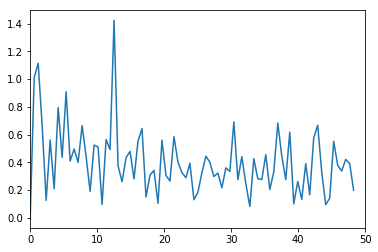

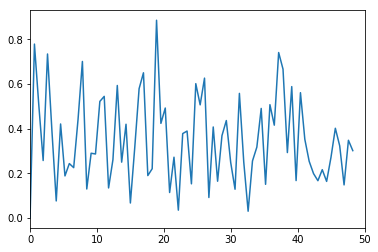

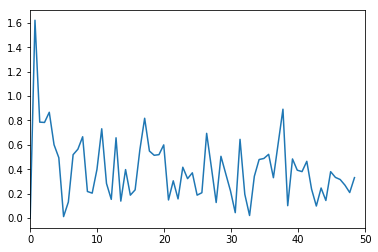

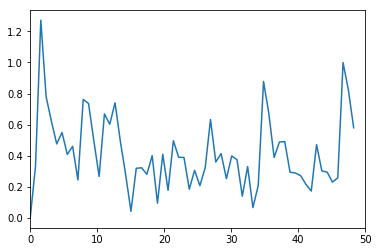

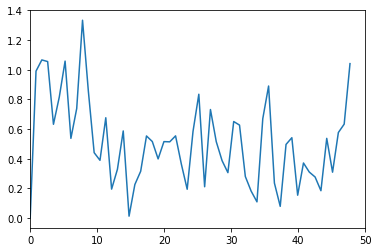

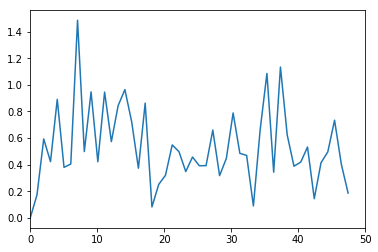

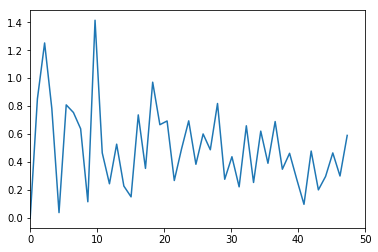

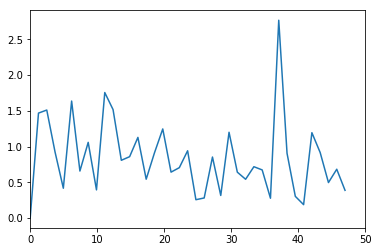

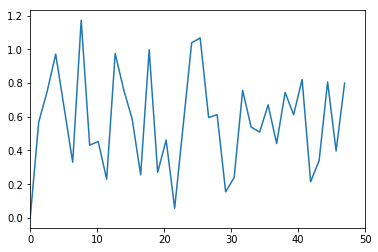

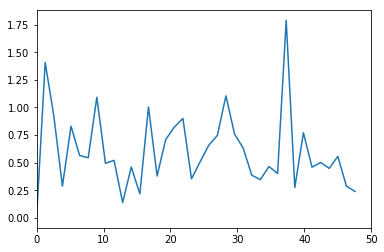

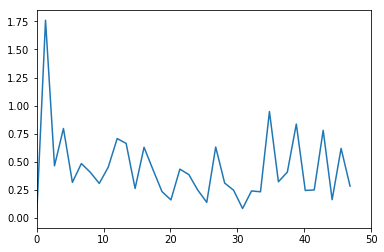

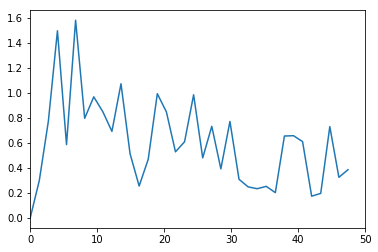

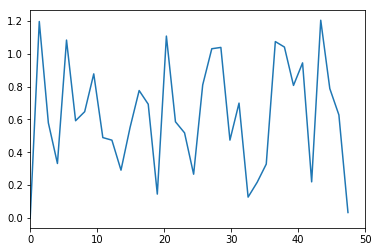

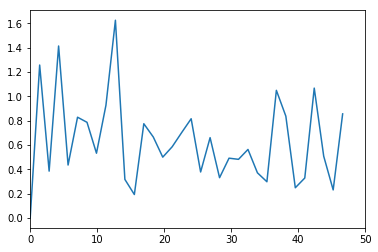

In [99]:
for i in range(0,20):
    traj_i = df_roi[df_roi['particle'] == arr_p[i]].copy()
    N = len(traj_i['x'])
    traj_i['x_rfcm'] = traj_i['x'] - traj_i['x_CM']
    traj_i['y_rfcm'] = traj_i['y'] - traj_i['y_CM']
    arr_time_i = np.linspace(0.0, 1.0 / fps * N, N)
    arr_freqs_i, arr_intens_i = get_spectrum(arr_time_i, traj_i['x_rfcm'])
    fig_i, ax_i = plt.subplots()
    ax_i.set_xlim(0, 50)
    ax_i.plot(arr_freqs_i, 2.0 / N * np.abs(arr_intens_i[0:N//2]))
    
    

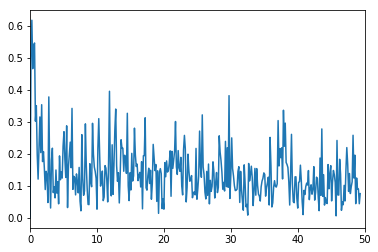

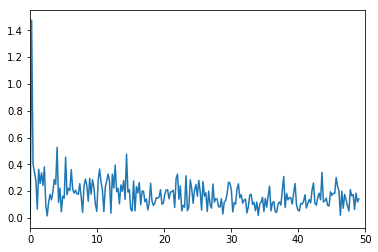

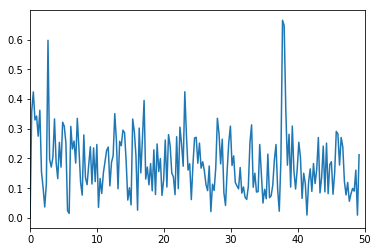

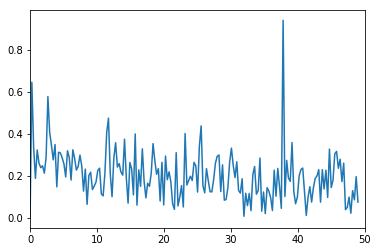

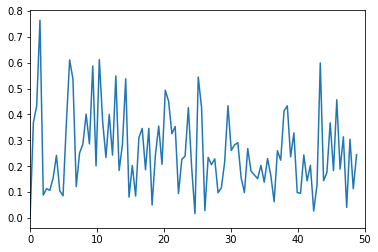

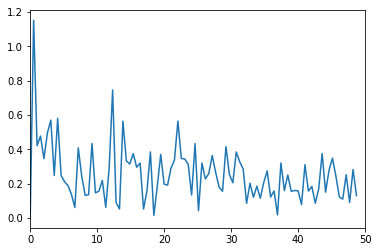

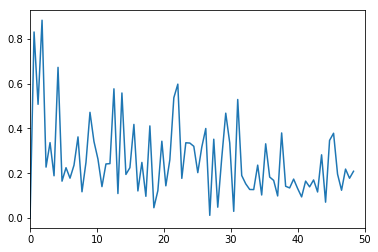

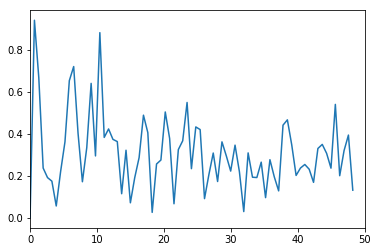

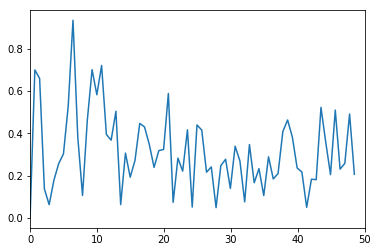

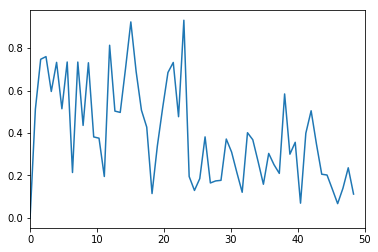

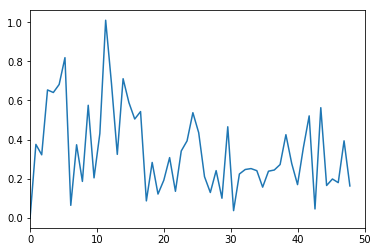

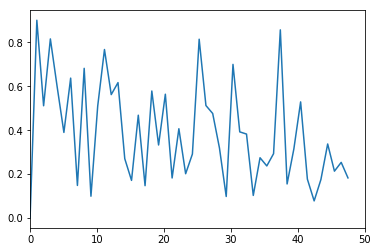

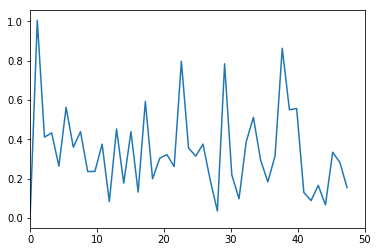

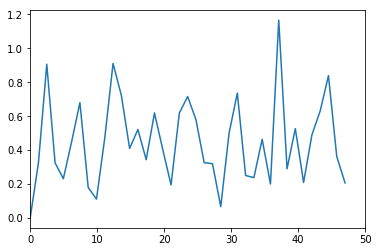

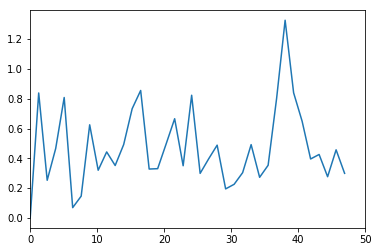

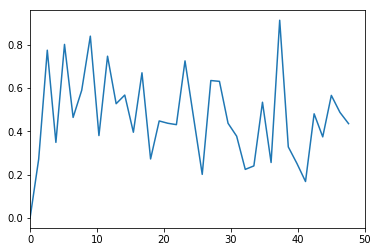

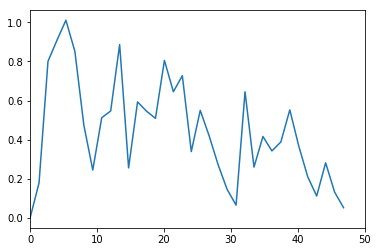

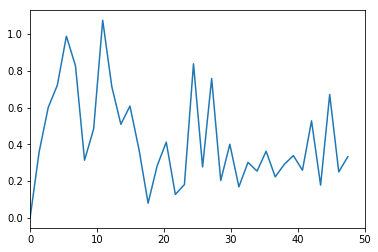

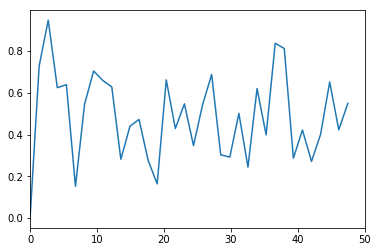

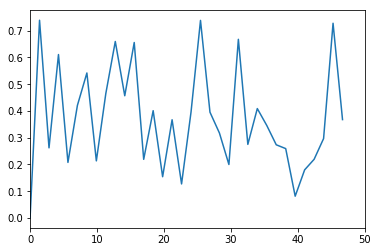

In [101]:
for i in range(0,20):
    traj_i = df_roi[df_roi['particle'] == arr_p[i]].copy()
    N = len(traj_i['y'])
    traj_i['x_rfcm'] = traj_i['x'] - traj_i['x_CM']
    traj_i['y_rfcm'] = traj_i['y'] - traj_i['y_CM']
    arr_time_i = np.linspace(0.0, 1.0 / fps * N, N)
    arr_freqs_i, arr_intens_i = get_spectrum(arr_time_i, traj_i['y_rfcm'])
    fig_i, ax_i = plt.subplots()
    ax_i.set_xlim(0, 50)
    ax_i.plot(arr_freqs_i, 2.0 / N * np.abs(arr_intens_i[0:N//2]))